Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.0765839102517413173
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.5946208033461174883
(0002, 0013) Implementation Version Name         SH: '0060622_R293a_P3'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 1028
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113543.6006.99.076583

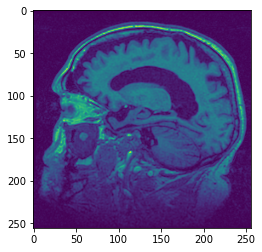

In [2]:
Config = {}
Config['root_path'] = r'C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619\MP-RAGE\2008-08-13_15_19_57.0\I116119'
filename = 'ADNI_002_S_0619_MR_MP-RAGE__br_raw_20080813225854680_102_S55372_I116119.dcm'

ds = dicom.dcmread(osp.join(Config['root_path'], filename))
print(ds)
print(ds.pixel_array)
plt.imshow(ds.pixel_array)
plt.show()

# Data cleaning and pre-processing

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path as osp
import pydicom as dicom
from os import walk
import math
import pandas
import csv

In [2]:
# get all the filenames in each dataset of a subject and extract the middle +- 15%
def get_all_filenames(dir_path):   
    # all the images of a subject
    subject_dataset = []

    # get all the filenames and paths in each sub dir of a subject
    for (dirpath, dirnames, filenames) in walk(dir_path):
        f = []
        full_dirpath = ''
        #print(dirpath)
        #print(dirnames)
            
        # the bottom of directories
        if len(dirnames) == 0:
            full_dirpath = dirpath
            f = filenames
            print(full_dirpath)           
            for j in range(len(f)):
                #print(f[j])
                f[j] = osp.join(full_dirpath, f[j])
            #for j in f:
            #    print(j)
            #    ds = dicom.dcmread(j)
            subject_dataset.append(f)
            
    #print(len(subject_dataset))
    #for i in subject_dataset:
    #    print(len(i))
    
    return subject_dataset
    
# extracing the middle +- 15% of the image set
def extract_middle(subject_dataset, threshold):
    subject_trimmed_dataset = []

    for i in subject_dataset:
        #print(i)
        #print(len(i))
        print(f"Length of original dataset = {len(i)}")

        middle = len(i) / 2 + 1
        #print(middle)
        start_index = math.ceil(middle - len(i) * threshold)
        end_index = math.floor(middle + len(i) * threshold) + 1
        #print(start_index)
        #print(end_index)

        subject_trimmed_dataset.extend(i[start_index:end_index])
        #for j in subject_trimmed_dataset:
        #    print(j)
        print(f"Length of trimmed dataset = {len(i[start_index:end_index])}")
        
    return subject_trimmed_dataset

# return label of the subject (CN, AD, etc.)
def get_subject_label(subject_id, df):
    #print(df['Subject'] == subject_id)
    #print(df['Group'][df['Subject'] == subject_id])
    group_list = df['Group'][df['Subject'] == subject_id].to_numpy()
    #print(group_list)
    
    return group_list[0]

In [3]:
# read labels from csv file
df = pandas.read_csv(r'C:\Users\John\Downloads\New folder (3)\loni_10_30_2021.csv')
print(df)

  Image Data ID     Subject Group Sex  Age  Visit Modality        Description  \
0        I18206  002_S_0685    CN   F   90      1      MRI  3-plane localizer   
1        I18208  002_S_0685    CN   F   90      1      MRI    Axial PD/T2 FSE   
2        I18205  002_S_0685    CN   F   90      1      MRI  3-plane localizer   
3        I18207  002_S_0685    CN   F   90      1      MRI  3-plane localizer   
4       I116120  002_S_0619    AD   M   80      6      MRI     MP-RAGE REPEAT   
5       I116119  002_S_0619    AD   M   80      6      MRI            MP-RAGE   
6       I116115  002_S_0619    AD   M   80      6      MRI  B1-Calibration PA   

       Type   Acq Date Format  Downloaded  
0  Original  7/06/2006    DCM         NaN  
1  Original  7/06/2006    DCM         NaN  
2  Original  7/06/2006    DCM         NaN  
3  Original  7/06/2006    DCM         NaN  
4  Original  8/13/2008    DCM         NaN  
5  Original  8/13/2008    DCM         NaN  
6  Original  8/13/2008    DCM         NaN  

In [4]:
# Look for subject_id from root path
root_path = r'C:\Users\John\Downloads\New folder (3)\loni\ADNI'
for (dirpath, dirnames, filenames) in walk(root_path):
    break
subject_id_list = dirnames
print(subject_id_list)

for subject_id in subject_id_list:
    label = get_subject_label(subject_id, df)
    print(label)

['002_S_0619', '002_S_0685']
AD
CN


In [5]:
# extract the middle +-15% of each dataset
threshold = 0.15

for subject_id in subject_id_list:
    dir_path = osp.join(root_path, subject_id)
    print(dir_path)
    subject_dataset = get_all_filenames(dir_path)
    subject_trimmed_dataset = extract_middle(subject_dataset, threshold)

C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619\B1-Calibration_PA\2008-08-13_15_36_09.0\I116115
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619\MP-RAGE\2008-08-13_15_19_57.0\I116119
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619\MP-RAGE_REPEAT\2008-08-13_15_28_06.0\I116120
Length of original dataset = 92
Length of trimmed dataset = 27
Length of original dataset = 166
Length of trimmed dataset = 49
Length of original dataset = 166
Length of trimmed dataset = 49
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18205
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18206
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18207
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_06

In [6]:
print(len(subject_trimmed_dataset))

21


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18205\ADNI_002_S_0685_MR_3-plane_localizer__br_raw_20060707100621912_4_S16305_I18205.dcm


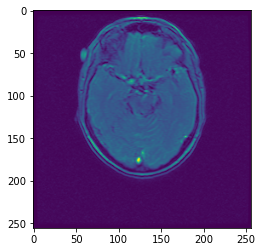

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18205\ADNI_002_S_0685_MR_3-plane_localizer__br_raw_20060707100623377_5_S16305_I18205.dcm


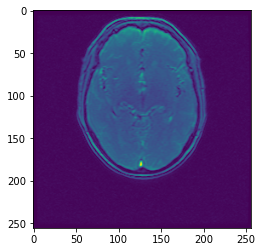

[[27 34 29 ... 18 27 19]
 [27 34 29 ... 21 30 20]
 [37 29 28 ... 52 65 49]
 ...
 [24 35 31 ... 16 18 22]
 [ 1  2  2 ...  2  2  1]
 [ 1  1  2 ...  2  2  1]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18206\ADNI_002_S_0685_MR_3-plane_localizer__br_raw_20060707100700193_14_S16305_I18206.dcm


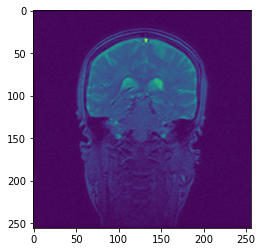

[[27 32 27 ... 17 22 21]
 [28 32 27 ... 17 21 22]
 [46 40 32 ... 27 19 30]
 ...
 [22 23 22 ... 21 28 24]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18206\ADNI_002_S_0685_MR_3-plane_localizer__br_raw_20060707100701584_15_S16305_I18206.dcm


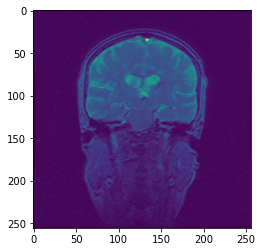

[[ 1  1  1 ...  2  1  1]
 [ 1  1  1 ...  2  1  1]
 [20 21 26 ... 22 17 30]
 ...
 [46 51 39 ... 51 38 32]
 [22 25 19 ... 25 29 28]
 [21 23 17 ... 23 28 28]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18207\ADNI_002_S_0685_MR_3-plane_localizer__br_raw_20060707100644586_9_S16305_I18207.dcm


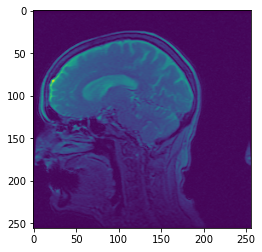

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [18 21 30 ... 27 13 16]
 ...
 [21 36 52 ... 37 29 35]
 [26 32 26 ... 26 15 23]
 [27 32 25 ... 25 14 22]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18207\ADNI_002_S_0685_MR_3-plane_localizer__br_raw_20060707100648345_10_S16305_I18207.dcm


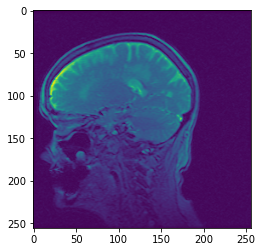

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102254778_51_S16306_I18208.dcm


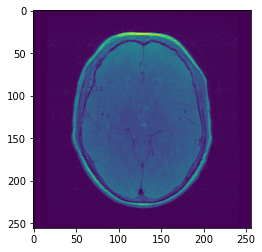

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102257839_59_S16306_I18208.dcm


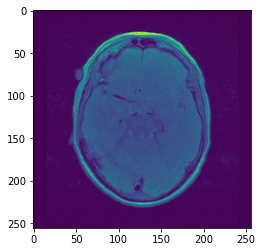

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102302073_67_S16306_I18208.dcm


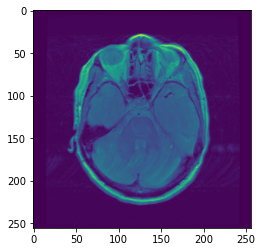

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102306826_75_S16306_I18208.dcm


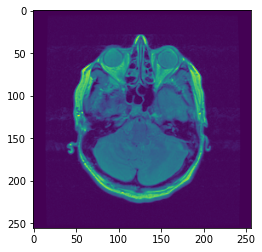

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102310676_83_S16306_I18208.dcm


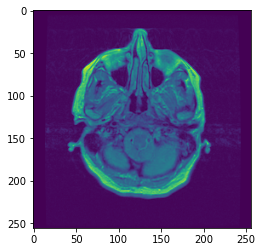

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102313657_91_S16306_I18208.dcm


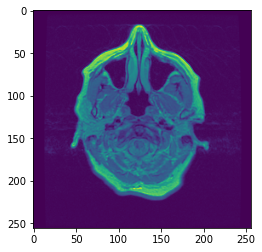

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102316530_5_S16306_I18208.dcm


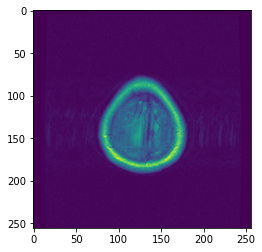

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102321616_13_S16306_I18208.dcm


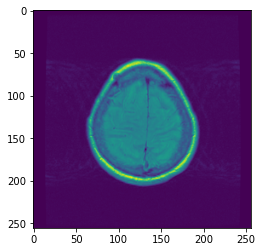

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102325264_21_S16306_I18208.dcm


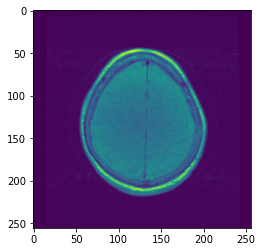

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102328698_29_S16306_I18208.dcm


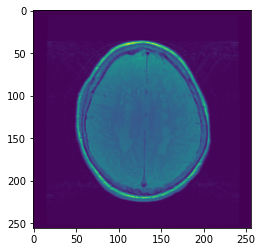

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102333797_37_S16306_I18208.dcm


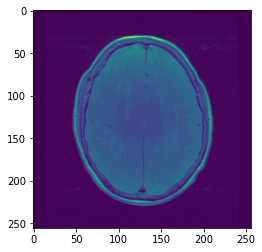

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102336894_45_S16306_I18208.dcm


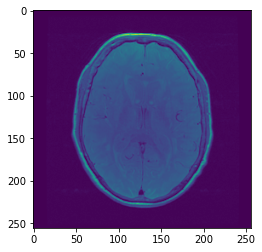

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102339931_53_S16306_I18208.dcm


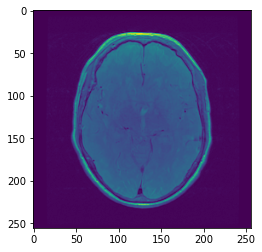

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102344038_61_S16306_I18208.dcm


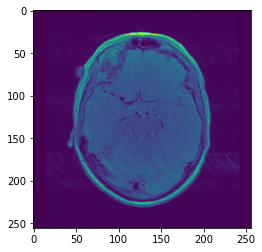

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208\ADNI_002_S_0685_MR_Axial_PD_T2_FSE__br_raw_20060707102349250_69_S16306_I18208.dcm


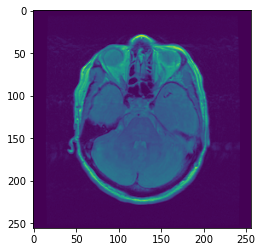

In [7]:
for i in subject_trimmed_dataset:
    ds = dicom.dcmread(i)
    print(ds.pixel_array)
    print(i)
    plt.imshow(ds.pixel_array)
    plt.show()

In [11]:
csv_file = open('files_and_labels.csv', 'w', newline='', encoding='utf-8')
for subject_id in subject_id_list:
    label = get_subject_label(subject_id, df)
    #print(label)
    dir_path = osp.join(root_path, subject_id)
    #print(dir_path)
    subject_dataset = get_all_filenames(dir_path)
    subject_trimmed_dataset = extract_middle(subject_dataset, threshold)
    
    writer = csv.writer(csv_file)
    for j in subject_trimmed_dataset:
        writer.writerow([j, label])
        
csv_file.close()

C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619\B1-Calibration_PA\2008-08-13_15_36_09.0\I116115
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619\MP-RAGE\2008-08-13_15_19_57.0\I116119
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0619\MP-RAGE_REPEAT\2008-08-13_15_28_06.0\I116120
Length of original dataset = 92
Length of trimmed dataset = 27
Length of original dataset = 166
Length of trimmed dataset = 49
Length of original dataset = 166
Length of trimmed dataset = 49
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18205
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18206
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\3-plane_localizer\2006-07-06_10_33_42.0\I18207
C:\Users\John\Downloads\New folder (3)\loni\ADNI\002_S_0685\Axial_PD_T2_FSE\2006-07-06_10_54_55.0\I18208
Length of original dataset = 5
Length of trimmed dataset = 2
Length of o

Convert AD and CN to 0 and 1?